<a href="https://colab.research.google.com/github/xainse/ml-internship/blob/main/Onix_Internship%2C_ML_Lesson_18.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout

In [3]:
# Google drive mount
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Setup the train and test directories
train_dir = "/content/drive/MyDrive/2022.01. ML Learning - Onix Internship (Serhii Kholin)/Lesson_018/dataset/train/"
test_dir = "/content/drive/MyDrive/2022.01. ML Learning - Onix Internship (Serhii Kholin)/Lesson_018/dataset/test/"

In [5]:
# Create ImageDataGenerator training instance with data augmentation
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=20, # rotate the image slightly between 0 and 20 degrees
                                             shear_range=0.2, # shear the image
                                             zoom_range=0.2, # zoom into the image
                                             width_shift_range=0.2, # shift the image width ways
                                             height_shift_range=0.2, # shift the image height ways
                                             horizontal_flip=True) # flip the image on the horizontal axis

In [6]:
# Import data and augment it from directories
train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(train_dir,
                                                                            target_size=(224, 224),
                                                                            batch_size=32,
                                                                            class_mode='categorical',
                                                                            shuffle=True) # Shuffle data (default)

Found 4562 images belonging to 3 classes.


In [7]:
# Create ImageDataGenerator test instance without data augmentation
test_datagen = ImageDataGenerator(rescale=1/255.)

In [8]:
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224, 224),
                                             batch_size=32,
                                             class_mode='categorical')

Found 900 images belonging to 3 classes.


In [9]:
model = tf.keras.models.Sequential([Conv2D(filters=32, 
                                           kernel_size=3,
                                           activation="relu", 
                                           input_shape=(224, 224, 3)),
                                    Conv2D(64, 3, activation="relu"),
                                    MaxPool2D(2),
                                    Conv2D(128, 3, activation="relu"),
                                    MaxPool2D(2),
                                    Conv2D(256, 3, activation="relu"),
                                    MaxPool2D(2),
                                    Conv2D(512, 3, activation="relu"),
                                    MaxPool2D(2),
                                    Flatten(),
                                    Dropout(0.7),
                                    Dense(2048, activation = 'relu'),
                                    Dense(3, activation="softmax")])

In [10]:
# Compile the model
model.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

In [11]:
# Check out the layers in our model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 64)      18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 64)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 128)     73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 128)      0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 52, 52, 256)       2

In [12]:
# Fit the model
history = model.fit(train_data_augmented_shuffled,
                    epochs=20,
                    steps_per_epoch=len(train_data_augmented_shuffled),
                    validation_data=test_data,
                    validation_steps=len(test_data))

Epoch 1/20
143/143 [==============================] - 914s 6s/step - loss: 1.1354 - accuracy: 0.4231 - val_loss: 0.9282 - val_accuracy: 0.5889
Epoch 2/20
143/143 [==============================] - 97s 680ms/step - loss: 0.8180 - accuracy: 0.6497 - val_loss: 0.7363 - val_accuracy: 0.7211
Epoch 3/20
143/143 [==============================] - 97s 674ms/step - loss: 0.7408 - accuracy: 0.7039 - val_loss: 0.7402 - val_accuracy: 0.7056
Epoch 4/20
143/143 [==============================] - 91s 635ms/step - loss: 0.6821 - accuracy: 0.7280 - val_loss: 0.6231 - val_accuracy: 0.7367
Epoch 5/20
143/143 [==============================] - 90s 629ms/step - loss: 0.6391 - accuracy: 0.7481 - val_loss: 0.5428 - val_accuracy: 0.8200
Epoch 6/20
143/143 [==============================] - 92s 638ms/step - loss: 0.6229 - accuracy: 0.7451 - val_loss: 0.5078 - val_accuracy: 0.8178
Epoch 7/20
143/143 [==============================] - 93s 650ms/step - loss: 0.6078 - accuracy: 0.7630 - val_loss: 0.5033 - val_accu

In [13]:
def plot_loss_curves(history):
    """
    Returns separate loss curves for training and validation metrics.
    """ 
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']

    epochs = range(len(history.history['loss']))

    # Plot loss
    plt.plot(epochs, loss, label='training_loss')
    plt.plot(epochs, val_loss, label='val_loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.legend()

    # Plot accuracy
    plt.figure()
    plt.plot(epochs, accuracy, label='training_accuracy')
    plt.plot(epochs, val_accuracy, label='val_accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.legend()

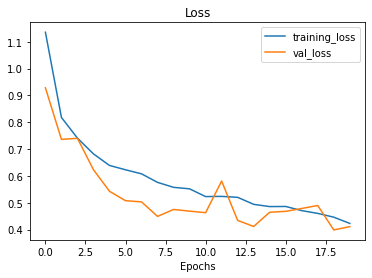

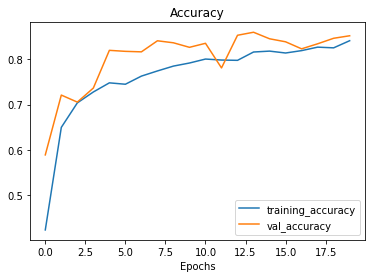

In [14]:
# Check out the loss curves of model
plot_loss_curves(history)

--2022-05-06 08:37:44--  https://cdn.pixabay.com/photo/2016/11/13/21/46/sheep-1822137__340.jpg
Resolving cdn.pixabay.com (cdn.pixabay.com)... 104.18.37.244, 172.64.150.12, 2606:4700:4400::ac40:960c, ...
Connecting to cdn.pixabay.com (cdn.pixabay.com)|104.18.37.244|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20723 (20K) [image/jpeg]
Saving to: ‘sheep-1822137__340.jpg’

sheep-1822137__340. 100%[===================>]  20.24K  --.-KB/s    in 0.001s  

2022-05-06 08:37:44 (23.9 MB/s) - ‘sheep-1822137__340.jpg’ saved [20723/20723]



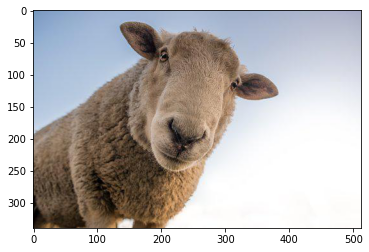

In [15]:
# View our example image
#!wget https://media-cdn.tripadvisor.com/media/photo-s/1c/d0/ba/1a/veggie-pizza.jpg
!wget https://cdn.pixabay.com/photo/2016/11/13/21/46/sheep-1822137__340.jpg
sheep = mpimg.imread("sheep-1822137__340.jpg")
plt.imshow(sheep)
plt.show()

In [16]:
# Check the shape of our image
sheep.shape

(340, 512, 3)

In [17]:
# Create a function to import an image and resize it to be able to be used with our model
def load_and_prep_image(filename, img_shape=224):
    """
    Reads an image from filename, turns it into a tensor
    and reshapes it to (img_shape, img_shape, colour_channel).
    """
    # Read in target file (an image)
    img = tf.io.read_file(filename)

    # Decode the read file into a tensor & ensure 3 colour channels 
    # (our model is trained on images with 3 colour channels
    # but sometimes images have 4 colour channels)
    img = tf.image.decode_image(img, channels=3)

    # Resize the image (to the same size our model was trained on)
    img = tf.image.resize(img, size = [img_shape, img_shape])

    # Rescale the image (get all values between 0 and 1)
    img = img/255.
    return img

In [18]:
# Load in and preprocess our custom image
sheep = load_and_prep_image("sheep-1822137__340.jpg")

In [19]:
sheep

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.4499425 , 0.59111893, 0.72445226],
        [0.45192325, 0.5930997 , 0.7264331 ],
        [0.45904112, 0.59237444, 0.72962934],
        ...,
        [0.6472764 , 0.6708058 , 0.76492345],
        [0.6440801 , 0.6676095 , 0.7617272 ],
        [0.64209926, 0.6656287 , 0.7597463 ]],

       [[0.4509804 , 0.5921569 , 0.7254902 ],
        [0.45483944, 0.5960159 , 0.72934926],
        [0.46205732, 0.5953907 , 0.7326456 ],
        ...,
        [0.65029263, 0.67382205, 0.7679397 ],
        [0.6469963 , 0.6705257 , 0.7646434 ],
        [0.6431373 , 0.6666667 , 0.7607843 ]],

       [[0.4560574 , 0.5972339 , 0.7305672 ],
        [0.45989648, 0.6010729 , 0.73440623],
        [0.46691427, 0.6002476 , 0.7375025 ],
        ...,
        [0.6551495 , 0.67867893, 0.7727966 ],
        [0.6520533 , 0.6755827 , 0.76970035],
        [0.6482143 , 0.6717437 , 0.76586133]],

       ...,

       [[0.10373431, 0.06402822, 0.01853739],
        [0.15

In [20]:
# Although our image is in the same shape as the images our model
# has been trained on, we're still missing a dimension.
# The batch size becomes the first dimension.
# So in reality, our model was trained on data
# in the shape of (batch_size, 224, 224, 3).
# We can fix this by adding an extra to our custom
# image tensor using tf.expand_dims.

# Add an extra axis
print(f"Shape before new dimension: {sheep.shape}")
sheep = tf.expand_dims(sheep, axis=0) # add an extra dimension at axis 0
print(f"Shape after new dimension: {sheep.shape}")

Shape before new dimension: (224, 224, 3)
Shape after new dimension: (1, 224, 224, 3)


In [21]:
sheep

<tf.Tensor: shape=(1, 224, 224, 3), dtype=float32, numpy=
array([[[[0.4499425 , 0.59111893, 0.72445226],
         [0.45192325, 0.5930997 , 0.7264331 ],
         [0.45904112, 0.59237444, 0.72962934],
         ...,
         [0.6472764 , 0.6708058 , 0.76492345],
         [0.6440801 , 0.6676095 , 0.7617272 ],
         [0.64209926, 0.6656287 , 0.7597463 ]],

        [[0.4509804 , 0.5921569 , 0.7254902 ],
         [0.45483944, 0.5960159 , 0.72934926],
         [0.46205732, 0.5953907 , 0.7326456 ],
         ...,
         [0.65029263, 0.67382205, 0.7679397 ],
         [0.6469963 , 0.6705257 , 0.7646434 ],
         [0.6431373 , 0.6666667 , 0.7607843 ]],

        [[0.4560574 , 0.5972339 , 0.7305672 ],
         [0.45989648, 0.6010729 , 0.73440623],
         [0.46691427, 0.6002476 , 0.7375025 ],
         ...,
         [0.6551495 , 0.67867893, 0.7727966 ],
         [0.6520533 , 0.6755827 , 0.76970035],
         [0.6482143 , 0.6717437 , 0.76586133]],

        ...,

        [[0.10373431, 0.06402822, 

In [22]:
# Make a prediction on custom image tensor
prediction = model.predict(sheep)
print(prediction)

[[0.099412  0.3720571 0.5285309]]
